In [42]:
#Clasificacion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


In [43]:
#Agrupa las flores virginia, setosa y versicolor


#Carga el dataset
iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                        columns= iris['feature_names'] + ['target'])

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [44]:
x = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [46]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)

print('Precisión de K-NN en el conjunto de entrenamiento: {:.2f}'.format(knn.score(x_train, y_train)))
print('Precisión de K-NN en el conjunto de prueba: {:.2f}'.format(knn.score(x_test, y_test)))

Precisión de K-NN en el conjunto de entrenamiento: 0.96
Precisión de K-NN en el conjunto de prueba: 0.96


In [47]:
pred = knn.predict(x_test)
confusionmat = confusion_matrix(y_test, pred)

print(confusionmat)
print(classification_report(y_test, pred))


[[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.94      0.94      0.94        16
         2.0       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [48]:
k_score = []

for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    k_score.append(scores.mean())

[0.9436363636363637, 0.9345454545454548, 0.9618181818181819, 0.9445454545454547, 0.9536363636363637, 0.9436363636363637, 0.9536363636363637, 0.9536363636363637, 0.9627272727272727, 0.9536363636363637, 0.9536363636363637, 0.9445454545454547, 0.9536363636363637, 0.9445454545454547, 0.9445454545454547, 0.9345454545454546, 0.9345454545454546, 0.9345454545454546, 0.9336363636363638, 0.9245454545454546, 0.9345454545454546, 0.9345454545454546, 0.9445454545454547, 0.9345454545454546, 0.9436363636363637, 0.9436363636363637, 0.9627272727272727, 0.9527272727272728, 0.9718181818181819, 0.9618181818181819]
0.9718181818181819


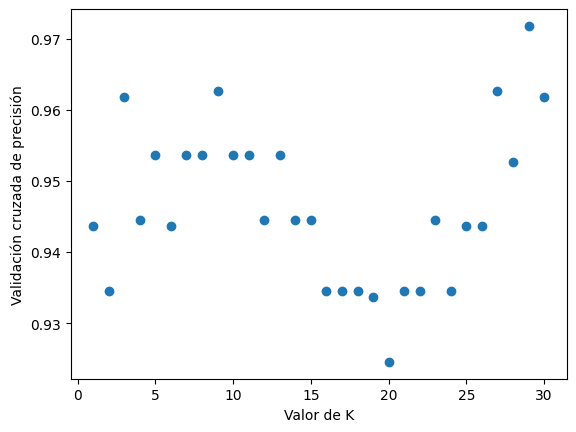

In [49]:
print(k_score)
print(max(k_score))
plt.scatter(range(1,31), k_score)
plt.xlabel('Valor de K')
plt.ylabel('Validación cruzada de precisión')
plt.show()

0.9609090909090909
